In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [3]:
# Loading the New Customer Data from the excel file

new_cust = pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')

C:\Users\abc\AppData\Local\Temp\ipykernel_22416\1923325525.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_cust = pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')


In [4]:
new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [5]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

**Data types and columns are fine. However  'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.**

## Total Records

In [6]:
print("Total records (rows) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


## Numeric Columns and Non-Numeric Columns

In [7]:
# select numeric columns
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : ")
print(numeric_cols)

#select non-numeric columns
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : ")
print(non_numeric_cols)


The numeric columns are : 
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are : 
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


# 1. Dropping Irrelevant Columns

**'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.**

In [8]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

# 2. Missing Values Check

In [9]:
# Total number of missing values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [10]:
#Percentage of missing values
new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

## 2.1 Last Name

Since all customers have a First Name, all the customers are identifiable. Hence it is okay to not have a last name. Filling last names with "None".

In [11]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [12]:
new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [13]:
new_cust['last_name'].fillna('None', axis=0, inplace=True)

In [14]:
new_cust['last_name'].isnull().sum()

0

**All missing values are replaced with None, now there are no missing values.**

## 2.2 Date of Birth 

In [15]:
new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [16]:
round(new_cust['DOB'].isnull().mean()*100)

2

**Only 2% of data has null date of birth, we can remove the records where date of birth is null.**

In [21]:
# Fetching the index of records where DOB is null

dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Int64Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775,
            835, 883, 904, 984],
           dtype='int64')

In [22]:
new_cust.drop(index=dob_index_drop, inplace=True, axis=0)

In [23]:
new_cust['DOB'].isnull().sum()

0

## Creating Age Column for checking further descripency in data

In [24]:
# function to find age of customers as of today.

def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cust['Age'] = new_cust['DOB'].apply(age)

**Descriptive Statistics of Age Column**

In [25]:
new_cust['Age'].describe()

count    983.000000
mean      52.739573
std       17.070279
min       22.000000
25%       41.000000
50%       52.000000
75%       66.000000
max       86.000000
Name: Age, dtype: float64

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

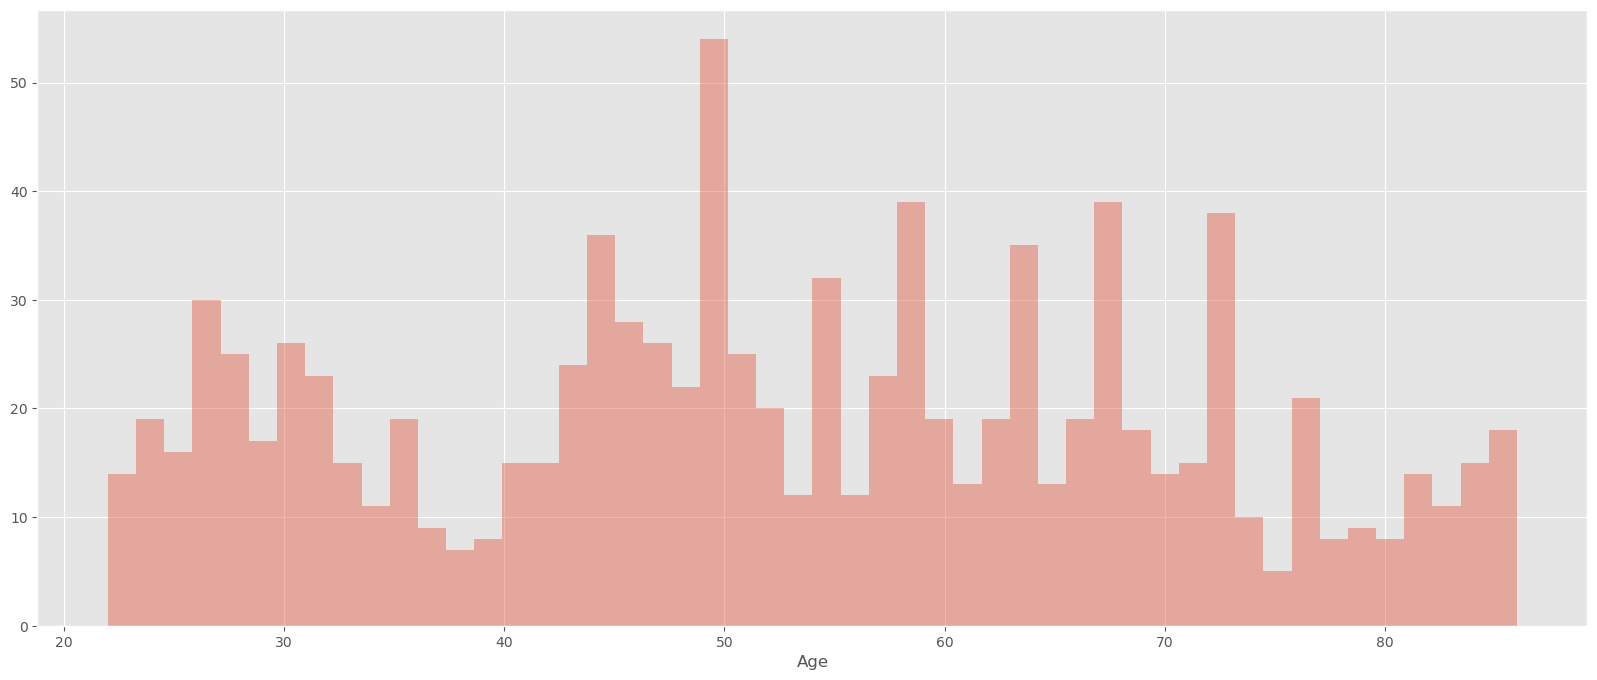

In [26]:
plt.figure(figsize=(20,8))
sns.distplot(new_cust['Age'], kde=False, bins=50)

## Creating Age Group Column

In [27]:
new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age Group'>

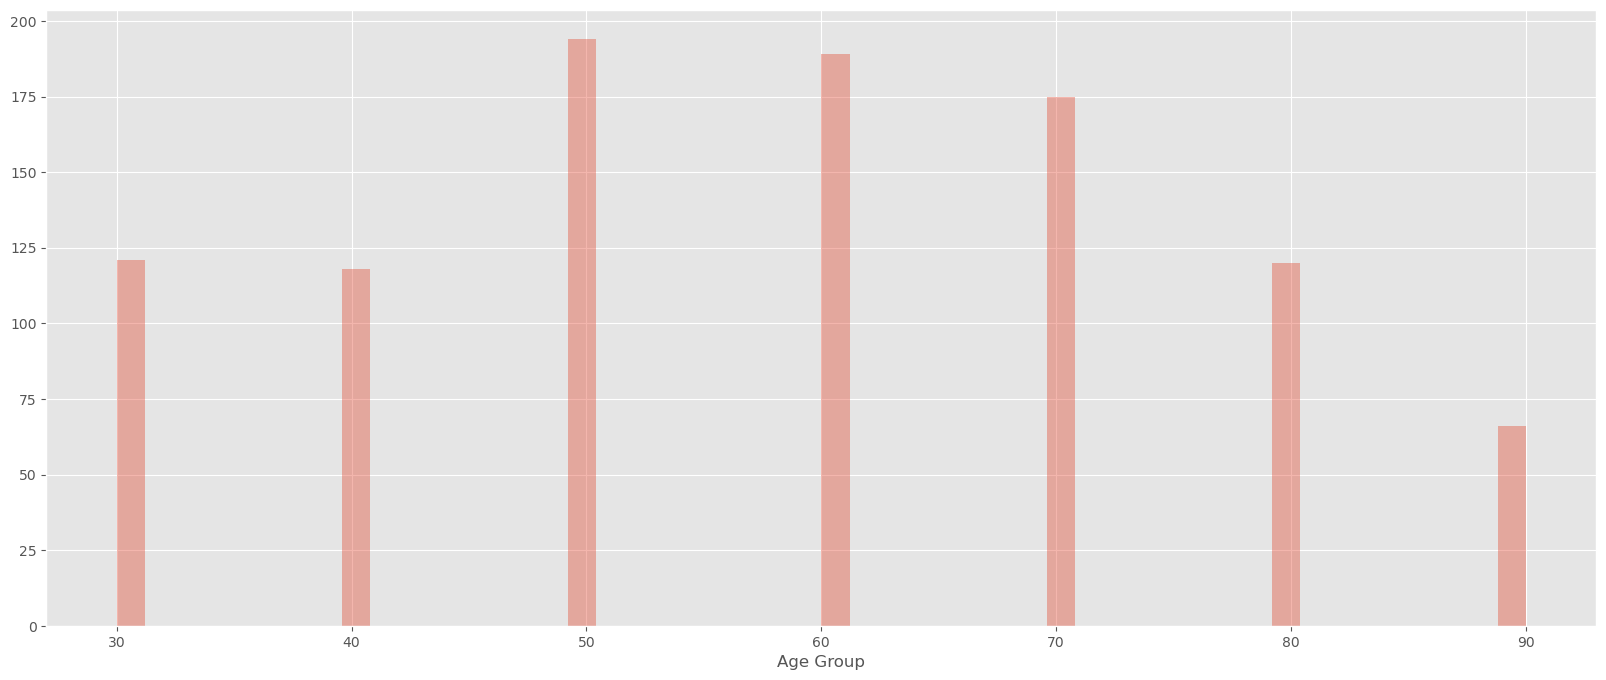

In [28]:
plt.figure(figsize=(20,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=50)

**Highest number of New Customers are from the Age Group 50-59.**

## 2.3 Job Title

In [29]:
new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,70,80
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,78,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,63,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,44,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,45,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,46,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,61,70
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,25,30
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,26,30


**Replacing null values with Missing**

In [30]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)

In [31]:
new_cust['job_title'].isnull().sum()

0

# 2.4 Job Industry Category

In [32]:
new_cust[new_cust['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,26,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,46,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,42,50
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,56,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,57,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,57,60
971,Frieda,Tavinor,Female,43,1999-03-04,Missing,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,25,30
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,56,60
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,32,40


**Replacing null values with Missing**

In [33]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [34]:
new_cust['job_industry_category'].isnull().sum()

0

In [35]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

**Now there are no missing values in dataset**

In [36]:
print("Total records after removing Missing Values: {}".format(new_cust.shape[0]))

Total records after removing Missing Values: 983


# 3. Inconsistency Check

Will check whether there is any inconsistent data / typo error present in categorial columns.
Columns to be checked are 'gender', 'wealth_segment', 'deceased_indicator', 'owns_car'.

## 3.1 Gender

In [38]:
new_cust['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

## 3.2 Wealth Segment

In [39]:
new_cust['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

## 3.3 Deceased Indicator

In [40]:
new_cust['deceased_indicator'].value_counts()

N    983
Name: deceased_indicator, dtype: int64

## 3.4 Owns Car

In [41]:
new_cust['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

# 3.5 State

In [42]:
new_cust['state'].value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

## 3.6 Country

In [43]:
new_cust['country'].value_counts()

Australia    983
Name: country, dtype: int64

## 3.7 Postcode

In [46]:
new_cust[['postcode','state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


## 3.8 Address

In [47]:
new_cust[['address','postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


## 3.9 Tenure

In [49]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

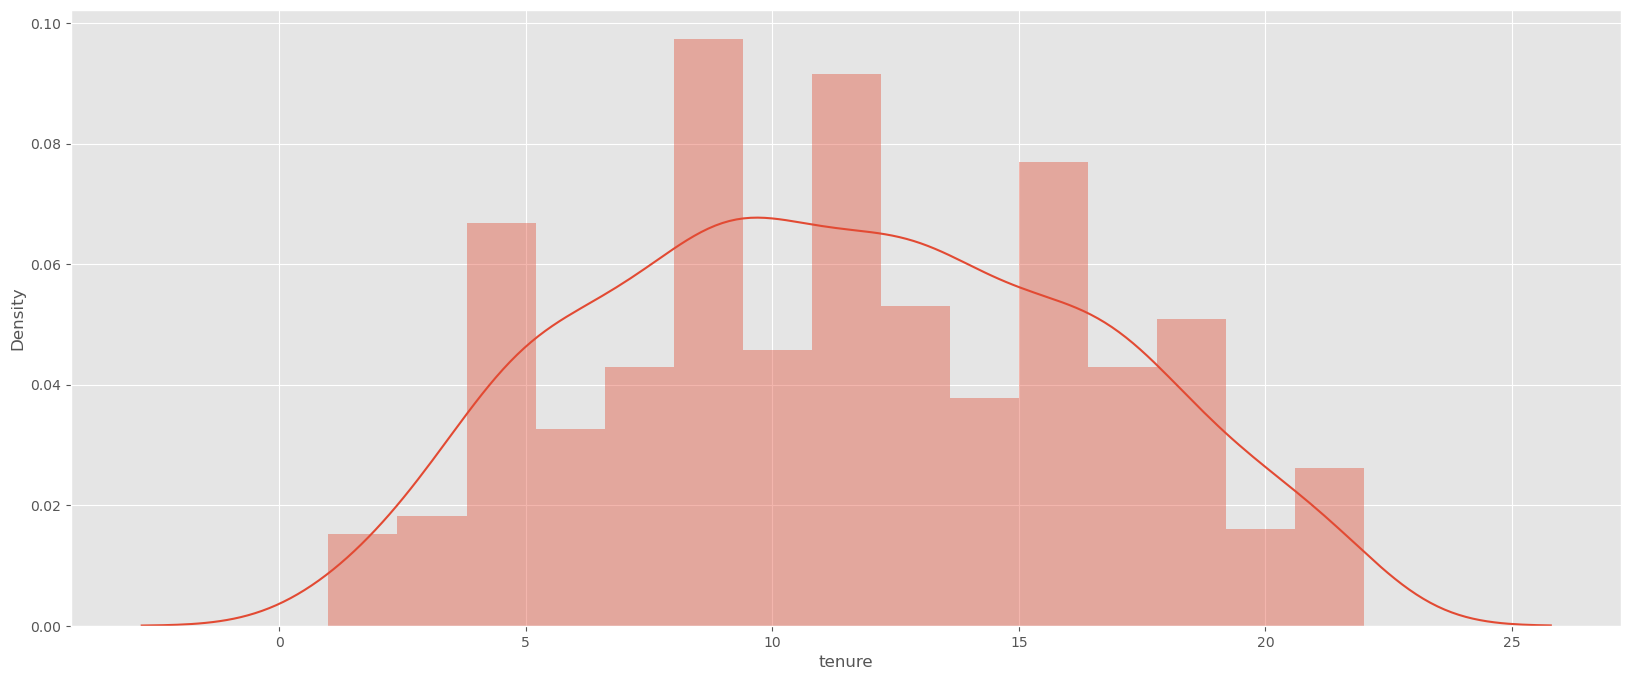

In [50]:
plt.figure(figsize=(20,8))
sns.distplot(new_cust['tenure'])

# 4. Duplication Checks

**We need to check for duplicates in the dataset. Duplicate records may lead to poor data analysis. We need to drop those records.**

**First we need to remove primary key column of dataset then apply drop_duplicates function provided by Python.**

In [51]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


**SInce both numbers are same. There are no duplicates record in dataset.

# 5. Exporting the Cleaned New Customers Data Set to csv

In [52]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)